In [34]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
data=pd.read_csv("diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [36]:
a=[x for x in data]
a

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

C:\Users\harih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

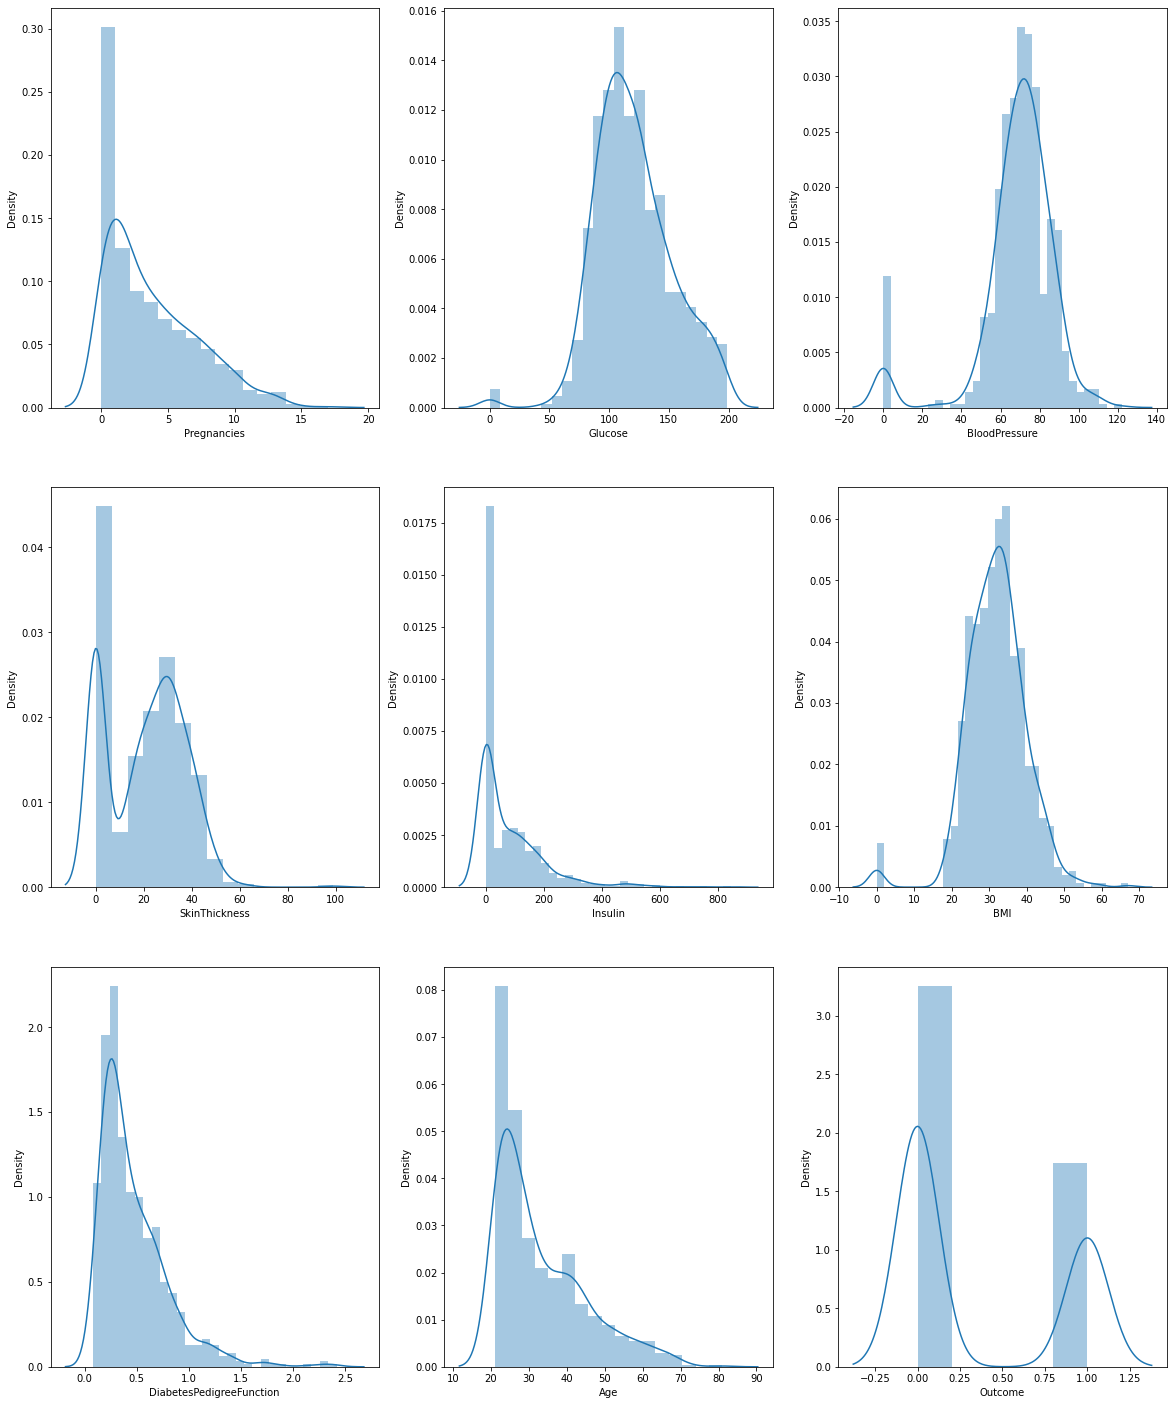

In [37]:
# let's see how data is distributed for every column
plt.figure(figsize=(20,25), facecolor='white')
x=1
for i in data:
    if x<=len(data.columns):
        plt.subplot(3,3,x)
        sns.distplot(data[i])
        plt.xlabel(i)
    x=x+1

<AxesSubplot:>

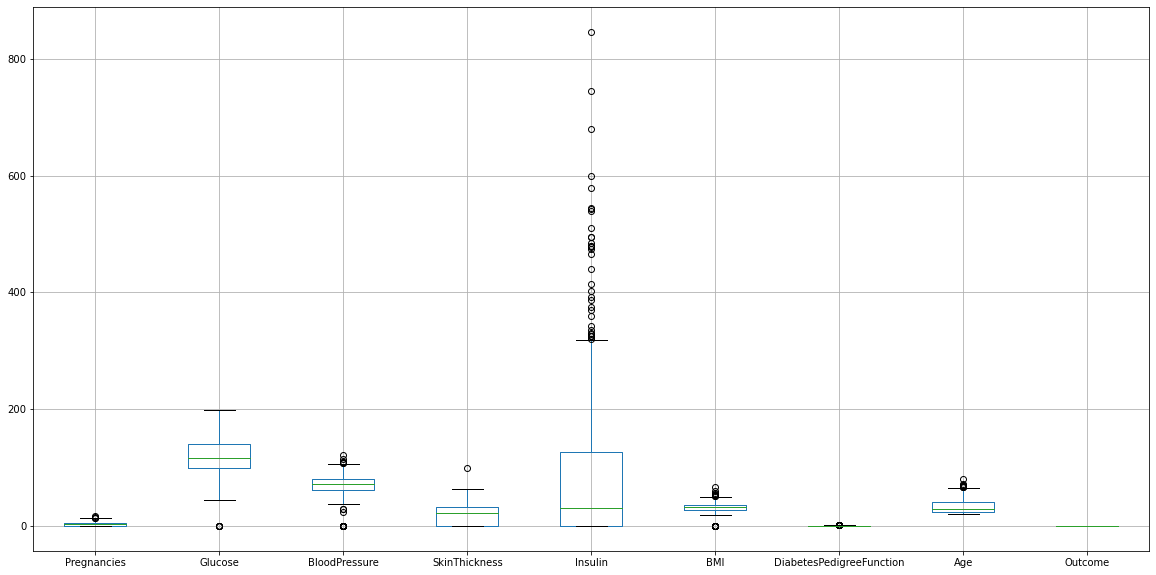

In [38]:
plt.figure(figsize=(20,10))
data.boxplot()

In [39]:
data.describe()
    

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [40]:
q1=data["Insulin"].quantile(0.25)
q3=data["Insulin"].quantile(0.75)

In [41]:
q1,q3

(0.0, 127.25)

In [42]:
iqr=q3-q1
iqr

127.25

In [43]:
upper_limit=(q3+1.5*iqr)
lower_limit=(q1-1.5*iqr)

In [44]:
upper_limit,lower_limit

(318.125, -190.875)

In [45]:
a=data[(data["Insulin"]>=lower_limit)&(data["Insulin"]<=upper_limit)]  
a

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [48]:
outliers_data =  data
for i in data.columns:
    q1=data[i].quantile(0.25)
    q3=data[i].quantile(0.75)
    iqr=q3-q1
    upper_limit=(q3+1.5*iqr)
    lower_limit=(q1-1.5*iqr)
    print(i+":"+str(upper_limit)+","+str(lower_limit))
    #print(data[(data[i]>=lower_limit)&(data[i]<=upper_limit)])
    outliers_data = outliers_data[(outliers_data[i]>=lower_limit)&(outliers_data[i]<=upper_limit)]
print(outliers_data)
    

Pregnancies:13.5,-6.5
Glucose:202.125,37.125
BloodPressure:107.0,35.0
SkinThickness:80.0,-48.0
Insulin:318.125,-190.875
BMI:50.550000000000004,13.35
DiabetesPedigreeFunction:1.2,-0.32999999999999996
Age:66.5,-1.5
Outcome:2.5,-1.5
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
5              5      116             74              0        0  25.6   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126     

<AxesSubplot:>

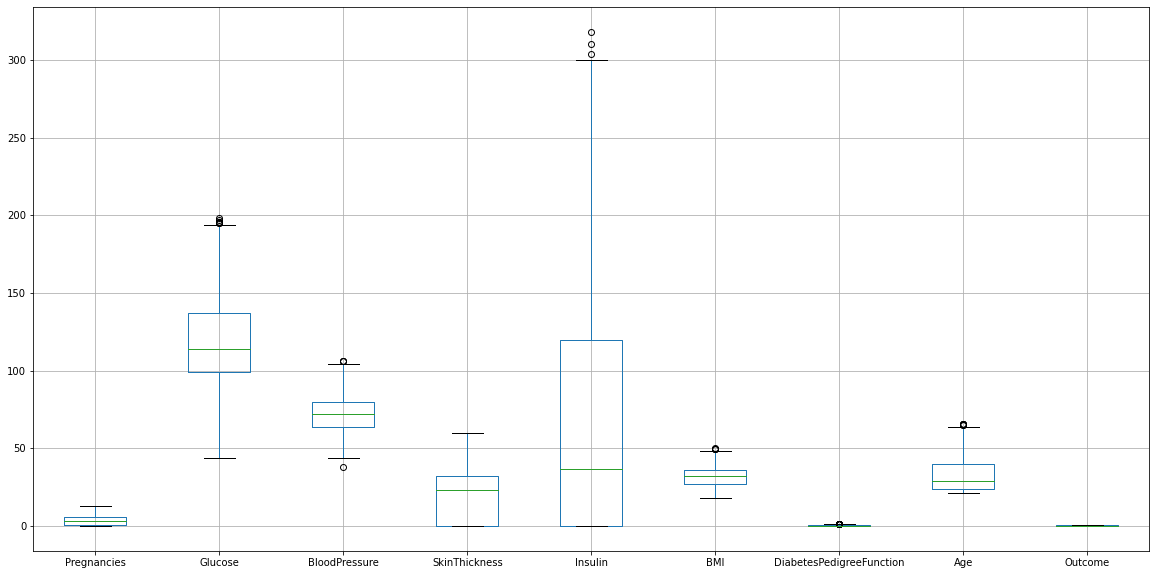

In [83]:
plt.figure(figsize=(20,10))
outliers_data.boxplot()

C:\Users\harih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harih\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

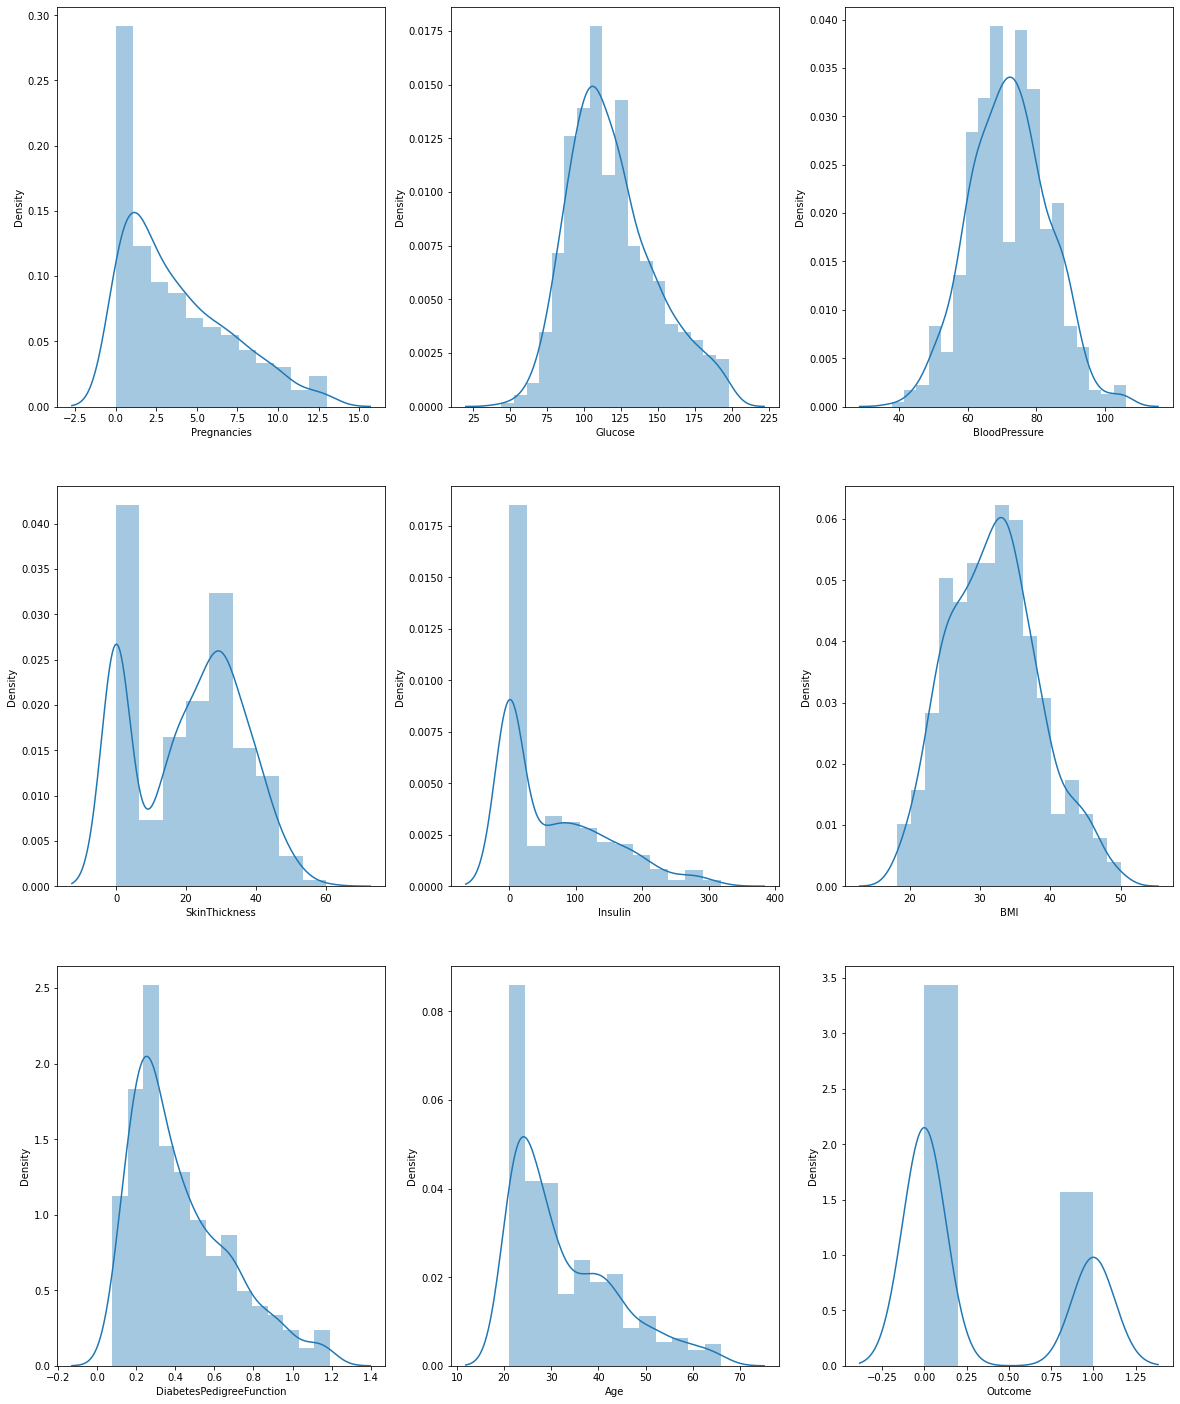

In [49]:
plt.figure(figsize=(20,25), facecolor='white')
x=1
for i in outliers_data:
    if x<=len(outliers_data.columns):
        plt.subplot(3,3,x)
        sns.distplot(outliers_data[i])
        plt.xlabel(i)
    x=x+1

In [52]:
X=outliers_data.iloc[:,:-1]
y=outliers_data.iloc[:,-1]

In [53]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [54]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [60]:
X.shape,X_train.shape,X_test.shape

((639, 8), (479, 8), (160, 8))

In [61]:
from sklearn.preprocessing import StandardScaler
sac=StandardScaler()

In [62]:
X_train=sac.fit_transform(X_train)

In [63]:
X_test=sac.transform(X_test)

In [64]:
X_train

array([[-0.52374712, -0.73619914, -1.09872316, ...,  0.38689921,
        -0.92522439, -0.94949506],
       [ 0.41468756, -0.15428596,  0.30846506, ..., -0.14498806,
        -0.34420379,  1.13157378],
       [-0.83655868, -0.8388897 , -1.09872316, ..., -1.25435295,
        -0.676788  , -0.94949506],
       ...,
       [ 1.04031068, -0.77042933,  0.30846506, ...,  1.32909953,
         1.77151264, -0.00355468],
       [ 1.04031068,  1.11223096,  1.36385623, ...,  2.71200644,
        -0.36824602,  0.37482147],
       [ 2.91718005,  1.11223096,  1.53975475, ..., -0.81364635,
         1.21052722,  1.03697974]])

In [65]:
X_test

array([[ 0.101876  , -0.5650482 , -1.09872316, ..., -1.23915617,
         2.15218131,  0.09103936],
       [ 1.04031068,  2.31028751, -0.39512905, ...,  0.84280259,
        -0.70083023,  0.84779166],
       [-0.21093556, -1.55772363, -0.39512905, ..., -0.37293975,
        -0.54455572, -0.85490103],
       ...,
       [-0.21093556, -1.04427082,  0.13256653, ..., -0.26656229,
         0.48926026,  0.56400955],
       [ 0.72749912,  0.4960876 , -0.21923052, ...,  0.49327667,
         0.45319691, -0.2873368 ],
       [-0.83655868, -1.18119157, -0.57102758, ..., -0.84403991,
        -0.31214748, -0.09814872]])

In [66]:
from sklearn.linear_model import LogisticRegression
regression=LogisticRegression()

In [67]:
regression.fit(X_train,y_train)

LogisticRegression()

In [68]:
reg_pred=regression.predict(X_test)
reg_pred

array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0], dtype=int64)

In [70]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
conf_mat = confusion_matrix(y_test,reg_pred)
conf_mat

array([[102,  17],
       [ 18,  23]], dtype=int64)

In [72]:
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

In [73]:
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.78125

In [74]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.8571428571428571

In [75]:
Recall = true_positive/(true_positive+false_negative)
Recall

0.85

In [76]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8535564853556485

In [77]:
auc = roc_auc_score(y_test,reg_pred)
auc

0.7090592334494774

In [80]:
fpr, tpr, thresholds = roc_curve(y_test, reg_pred)

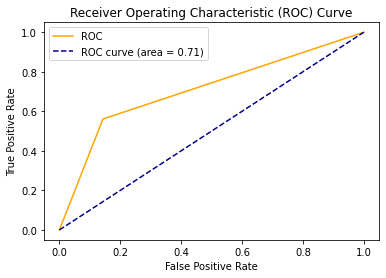

In [81]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()